### 1. 环境准备

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [2]:
# 包导入
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2. 数据加载



     MODELYEAR       MAKE                  MODEL             VEHICLECLASS  \
799       2014       MINI         COOPER S COUPE               TWO-SEATER   
477       2014        GMC               YUKON XL           SUV - STANDARD   
451       2014        GMC  SAVANA 3500 PASSENGER          VAN - PASSENGER   
377       2014       FORD               F150 FFV  PICKUP TRUCK - STANDARD   
242       2014  CHEVROLET          SILVERADO 4WD  PICKUP TRUCK - STANDARD   

     ENGINESIZE  CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  \
799         1.6          4           M6        Z                   9.1   
477         5.3          8           A6        X                  16.0   
451         6.0          8           A6        X                  22.1   
377         3.7          6          AS6        X                  14.0   
242         4.3          6           A6        X                  14.2   

     FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
799             

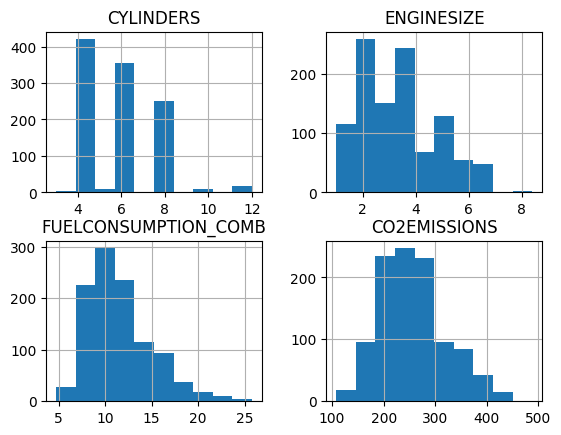

In [3]:
## pandas加载csv数据，
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
print(df.sample(5))  # 查看前5行数据

print(df.describe()) #查看数据分析每列的 总计、平均、方差、最大值，最小值等

# 从原表格中仅取4列
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
print(cdf.sample(9)) #查看新表格的前9行

# 重新选择这4列，但是列顺序变了
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist() # 给viz表格的每一列画出直方图 Histogram
plt.show() 

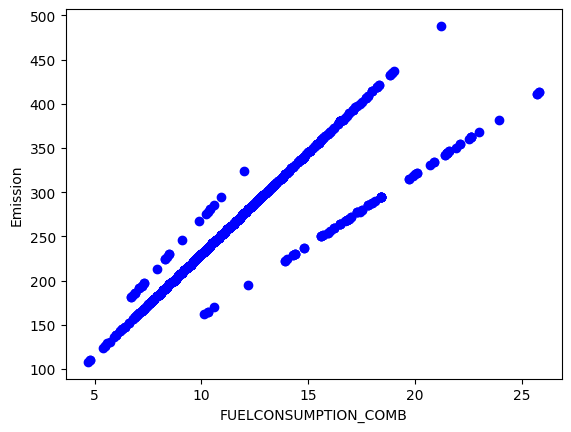

In [4]:
# 画一组散点图，描述油耗，与 CO2排放的关系
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()


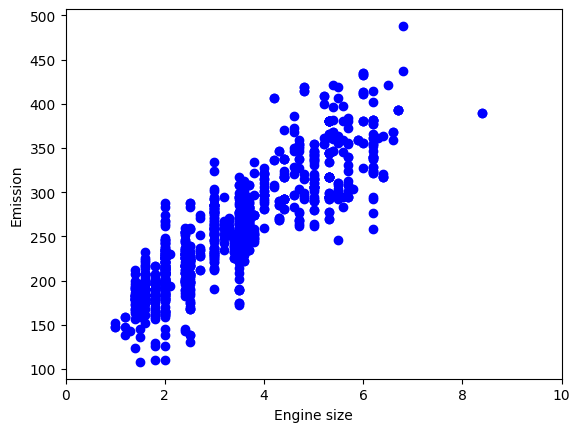

In [5]:
# 画另一组散点图，描述发动机尺寸与CO2排放的关系
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,10)
plt.show()

### 3. 模型训练

In [7]:
# pands张量 转 numpy
from sklearn.model_selection import train_test_split

X = cdf['ENGINESIZE'].to_numpy()
y = cdf['CO2EMISSIONS'].to_numpy()

#  按2比8的比例 分配训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(type(X_train), len(X), np.shape(X_train), np.shape(X_train))

<class 'numpy.ndarray'> 1067 (853,) (853,)


In [8]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

X_train_1 = X_train.reshape(-1, 1) # 把853个元素的行向量 转成853行1列的矩阵，-1表示为n行， sklearn 需要一个2D矩阵 
regressor.fit(X_train_1, y_train)

print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


#### 线性回归模型的预测函数
$$\hat{Y} = \beta_1 X + \beta_0$$  
	•	$\hat{Y}$：预测的目标值（比如：排放量）  
	•	X：输入变量（比如：引擎大小），相当于本demo中的X_train     
	•	$\beta_1$：系数，表示每增加一个单位的 X，Y 增加多少（斜率）,相当于 regressor.coef_    
	•	$\beta_0$：截距，X = 0 时，Y 的预测值（Y轴上的起点）相当于 regressor.intercept_ 


Text(0, 0.5, 'Emission')

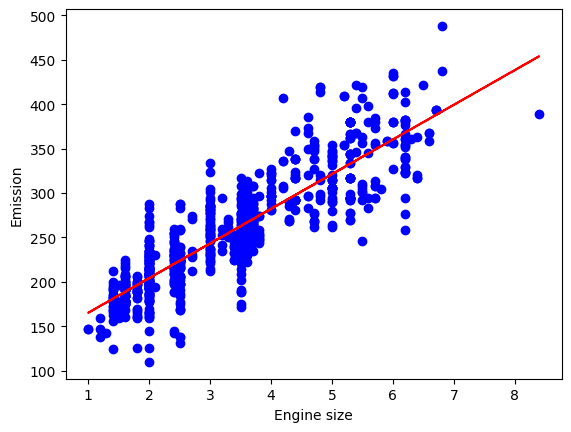

In [9]:
plt.scatter(X_train, y_train,  color='blue') # 蓝色散点图
#根据我们训练好的模型，在 X_train 的范围内，画出 预测出来的那条回归直线，也就是常见的“最小二乘直线”。 Y=regressor.coef_ * X_train + regressor.intercept_
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r') # 图上的红色回归线，蓝色真实值和模型计算的预测值，计算得最小二乘直线
plt.xlabel("Engine size")
plt.ylabel("Emission")

### 4. 模型评估


In [11]:
# 模型预测
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


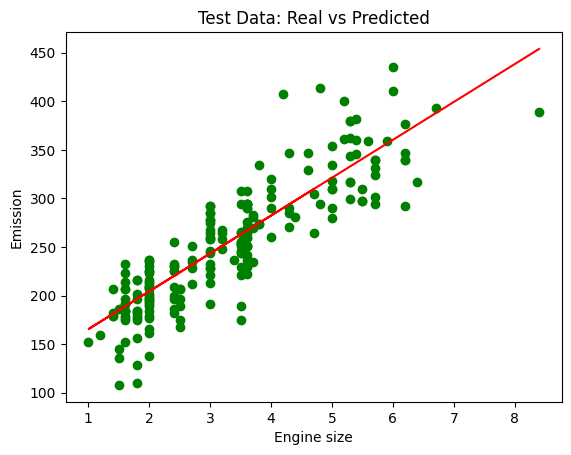

In [17]:
X_test_2d = X_test.reshape(-1,1)

plt.scatter(X_test, y_test, color='green')  # 测试集的真实点
plt.plot(X_test_2d, regressor.predict(X_test_2d).reshape(-1, 1), '-r')  # 回归模型在测试集上的预测线；测试集的真实值 和 模型预测值 计算得到的回归线
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Test Data: Real vs Predicted")
plt.show()